In [ ]:
!pip install hpelm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.5 MB/s eta 0:00:00


**ELM** (Extreme Learning Machine)

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from hpelm import ELM
from sklearn.metrics import classification_report, accuracy_score
df=pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:

# 2. Check and handle missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing values in each column:
review       0
sentiment    0
dtype: int64


In [ ]:

# 3. Encode labels
le = LabelEncoder()
df['review_encoded'] = le.fit_transform(df['sentiment'])
print("\nEncoded labels:")
print(df[['review', 'review_encoded']].head())



Encoded labels:
                                              review  review_encoded
0  One of the other reviewers has mentioned that ...               1
1  A wonderful little production. <br /><br />The...               1
2  I thought this was a wonderful way to spend ti...               1
3  Basically there's a family where a little boy ...               0
4  Petter Mattei's "Love in the Time of Money" is...               1


In [ ]:
# 4. Feature extraction using TF-IDF
X = df['review']
y = df['review_encoded']

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
X_tfidf = vectorizer.fit_transform(X)
X_dense = X_tfidf.toarray()


In [ ]:
# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 1. Convert to NumPy arrays if they're pandas DataFrames/Series
X_train_elm = np.array(X_train)
y_train_elm = np.array(y_train)
X_test_elm = np.array(X_test)
y_test_elm = np.array(y_test)

# 2. Initialize and train ELM
elm = ELM(X_train_elm.shape[1], 1, classification='c')  # Assuming binary classification
elm.add_neurons(1000, 'sigm')

print("\nTraining the ELM...")
elm.train(X_train_elm, y_train_elm)
print("Training completed.")

# 3. Make predictions
y_pred_elm = elm.predict(X_test_elm)
y_pred_labels_elm = (y_pred_elm.flatten() >= 0.5).astype(int)  # Binary classification threshold at 0.5

# 4. Evaluate the model
accuracy_elm= accuracy_score(y_test_elm, y_pred_labels_elm)
print(f"\nELM Accuracy: {accuracy_elm * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test_elm, y_pred_labels_elm, target_names=le.classes_))



Training the ELM...
Training completed.

ELM Accuracy: 80.65%

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.80      0.80      5000
    positive       0.80      0.82      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



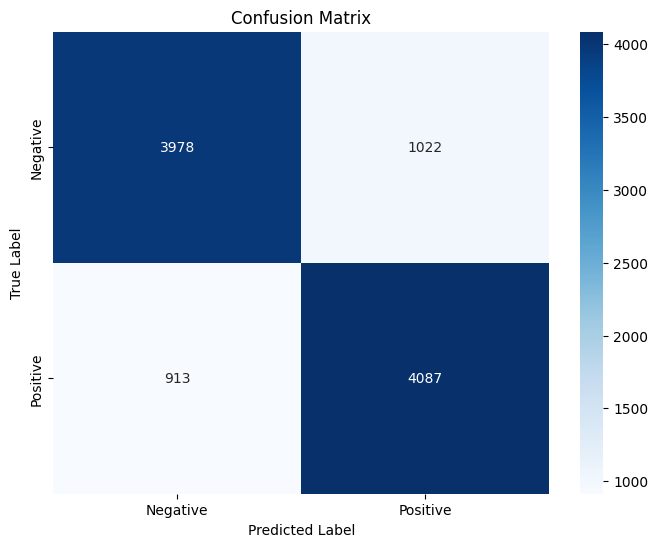

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Compute confusion


cm_elm = confusion_matrix(y_test_elm, y_pred_labels_elm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_elm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Lazy Learner Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/IMDB Dataset.csv')

# Preprocessing
ll_reviews = data['review'].values
ll_sentiments = data['sentiment'].values
ll_sentiments = pd.Series(ll_sentiments)
# Label encoding the sentiment column
ll_sentiments = ll_sentiments.map({'negative': 0, 'positive': 1})

# Vectorization using TF-IDF
ll_vectorizer = TfidfVectorizer(max_features=5000)
X = ll_vectorizer.fit_transform(ll_reviews).toarray()
y = ll_sentiments

# Train-test split
ll_X_train, ll_X_test, ll_y_train, ll_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k-NN Mean Accuracy: 0.7195
Logistic Regression Mean Accuracy: 0.8879
Random Forest Mean Accuracy: 0.8425


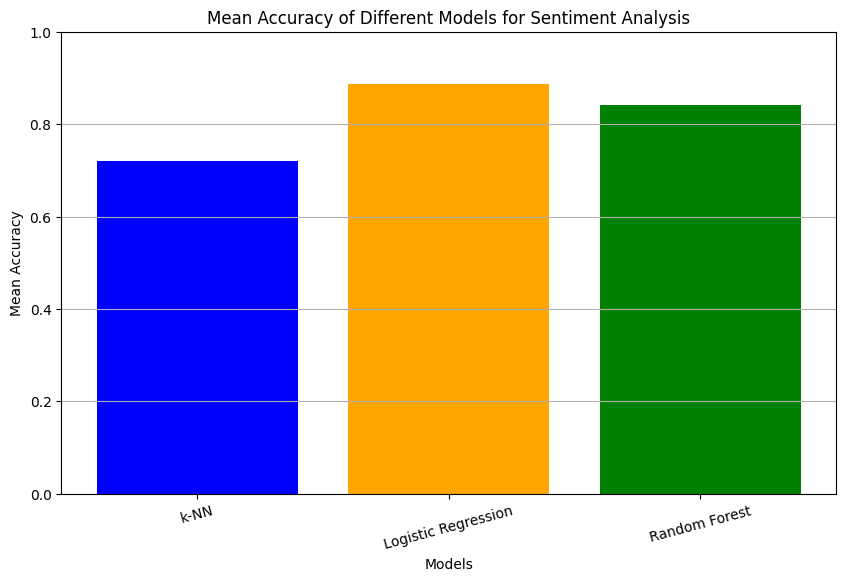


Best Model: Logistic Regression with Mean Accuracy: 0.8879


In [ ]:

# Define the models to evaluate
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),

}

ll_mean_accuracies = []
ll_best_model = None
ll_best_accuracy = 0

# Evaluate each model
for model_name, model in models.items():
    ll_scores = cross_val_score(model, ll_X_train, ll_y_train, cv=5, scoring='accuracy')
    ll_mean_accuracy = np.mean(ll_scores)
    ll_mean_accuracies.append(ll_mean_accuracy)

    print(f"{model_name} Mean Accuracy: {ll_mean_accuracy:.4f}")

    # Check for the best model
    if ll_mean_accuracy > ll_best_accuracy:
        ll_best_accuracy = ll_mean_accuracy
        ll_best_model = model_name

# Plotting the performance of all evaluated models
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), ll_mean_accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Mean Accuracy of Different Models for Sentiment Analysis')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Display the plot
plt.show()

# Display the best model
print(f"\nBest Model: {ll_best_model} with Mean Accuracy: {ll_best_accuracy:.4f}")


CNN(Convolution Neural Network)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 178ms/step - accuracy: 0.7333 - loss: 0.4805 - val_accuracy: 0.8935 - val_loss: 0.2517
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 186ms/step - accuracy: 0.9160 - loss: 0.2190 - val_accuracy: 0.9004 - val_loss: 0.2444
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.9450 - loss: 0.1536 - val_accuracy: 0.8930 - val_loss: 0.2677
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 172ms/step - accuracy: 0.9695 - loss: 0.0897 - val_accuracy: 0.8888 - val_loss: 0.3339
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 171ms/step - accuracy: 0.9850 - loss: 0.0450 - val_accuracy: 0.8866 - val_loss: 0.4874
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 180ms/step - accuracy: 0.9917 - loss: 0.0248 - val_accuracy: 0.8855 - val_loss: 0.5486
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 173ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.8842 - val_loss: 0.6443
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 179ms/step - accuracy: 0.9943 -

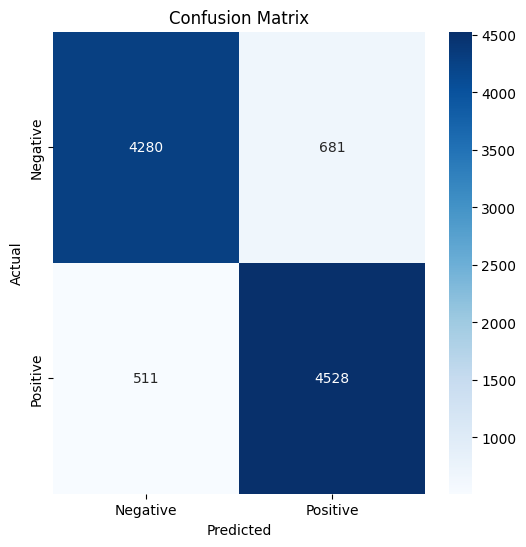

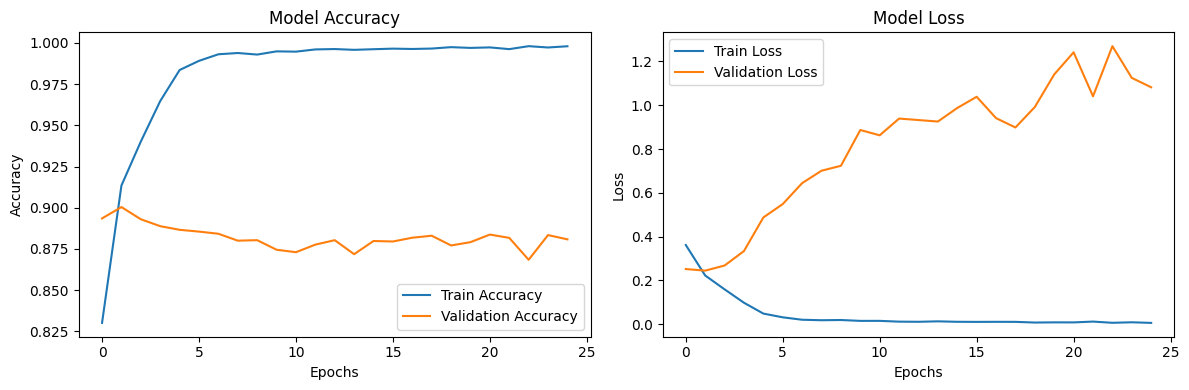

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with error handling
file_path = '/content/IMDB Dataset.csv'  # Adjust this path if necessary

try:
    data = pd.read_csv(file_path, encoding='utf-8')  # Try with utf-8 encoding
except UnicodeDecodeError:
    # If utf-8 fails, try another encoding
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e:
    print(f"Error loading dataset: {e}")
    data = None

# Check if dataset is loaded successfully
if data is not None:
    # Preprocessing
    reviews = data['review'].values
    sentiments = data['sentiment'].values

    # Label encoding the sentiment column (positive -> 1, negative -> 0)
    label_encoder = LabelEncoder()
    sentiments = label_encoder.fit_transform(sentiments)

    # Tokenization and padding
    max_words = 5000  # Max number of words to consider in the tokenizer
    max_sequence_length = 200  # Max length of review text sequences
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(reviews)
    sequences = tokenizer.texts_to_sequences(reviews)

    # Padding the sequences to ensure equal input length
    X = pad_sequences(sequences, maxlen=max_sequence_length)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)

    # CNN Model
    embedding_dim = 100
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
    # CNN Layer
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    # Flatten the output to feed into a dense layer
    model.add(Flatten())
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))  # Ensure a single output for binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    batch_size = 64
    epochs = 25
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    # Display classification report
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Plot Confusion Matrix
    def plot_confusion_matrix(y_true, y_pred, labels):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    # Plot Model Loss and Accuracy
    def plot_training_history(history):
        plt.figure(figsize=(12, 4))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])

    # Plot the model loss and accuracy
    plot_training_history(history)
else:
    print("Failed to load dataset.")


CNN-BiLSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, GRU, Dense, Dropout, Bidirectional, Input, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K


In [ ]:

# Load the dataset
data = pd.read_csv('/content/IMDB Dataset.csv')

# Preprocessing
reviews = data['review'].values
sentiments = data['sentiment'].values

# Label encoding the sentiment column (positive -> 1, negative -> 0)
label_encoder = LabelEncoder()
sentiments = label_encoder.fit_transform(sentiments)

# Tokenization and padding
max_words = 5000  # Max number of words to consider in the tokenizer
max_sequence_length = 300  # Sequence length for better context

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Padding the sequences to ensure equal input length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)


In [ ]:

# Define custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        score = K.tanh(K.dot(x, self.W) + self.b)
        attention_weights = K.softmax(score, axis=1)
        context_vector = attention_weights * x
        context_vector = K.sum(context_vector, axis=1)
        return context_vector

# CNN-LSTM/GRU Model
embedding_dim = 200  # Embedding dimension

input_layer = Input(shape=(max_sequence_length,))

# Embedding layer (Randomly initialized and trainable)
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length)(input_layer)

# CNN Layer
cnn_layer = Conv1D(filters=256, kernel_size=5, activation='relu')(embedding_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)

# LSTM/GRU Layer (Choose LSTM or GRU)
use_gru = False  # Set to True to use GRU instead of LSTM
if use_gru:
    rnn_layer = Bidirectional(GRU(150, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(cnn_layer)
else:
    rnn_layer = Bidirectional(LSTM(150, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(cnn_layer)

# Attention Layer
attention_layer = AttentionLayer()(rnn_layer)

# Fully connected layers
dense_layer = Dense(128, activation='relu')(attention_layer)
dense_layer = Dropout(0.5)(dense_layer)

# Output layer (binary classification)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Compile the model with Adam optimizer and a lower learning rate
cnn_bilstm_model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=0.0005)
cnn_bilstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
cnn_bilstm_model.summary()

# Early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
batch_size = 64
epochs = 5  # Increase epochs to give the model more time to converge

cnn_bilstm_history = cnn_bilstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
cnn_bilstm_loss, cnn_bilstm_accuracy = cnn_bilstm_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {cnn_bilstm_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 300, 200)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 296, 256)            │         256,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 148, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 148, 300)            │         488,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer_1 (AttentionLayer)   │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,873,613 (7.15 MB)

 Trainable params: 1,873,613 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1134s 2s/step - accuracy: 0.7139 - loss: 0.4937 - val_accuracy: 0.8959 - val_loss: 0.2536 - learning_rate: 5.0000e-04
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1157s 2s/step - accuracy: 0.9085 - loss: 0.2402 - val_accuracy: 0.8987 - val_loss: 0.2475 - learning_rate: 5.0000e-04
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1123s 2s/step - accuracy: 0.9312 - loss: 0.1838 - val_accuracy: 0.9000 - val_loss: 0.2486 - learning_rate: 5.0000e-04
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1161s 2s/step - accuracy: 0.9475 - loss: 0.1481 - val_accuracy: 0.8966 - val_loss: 0.2645 - learning_rate: 5.0000e-04
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.9595 - loss: 0.1179 - val_accuracy: 0.8946 - val_loss: 0.2857 - learning_rate: 5.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 298ms/step - accuracy: 0.8941 - loss: 0.2843


Test Accuracy: 89.46%


In [ ]:
# Save the model
cnn_bilstm_model.save('cnn_lstm_attention_model_tuned.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 305ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.91      0.90      4961
    Positive       0.91      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



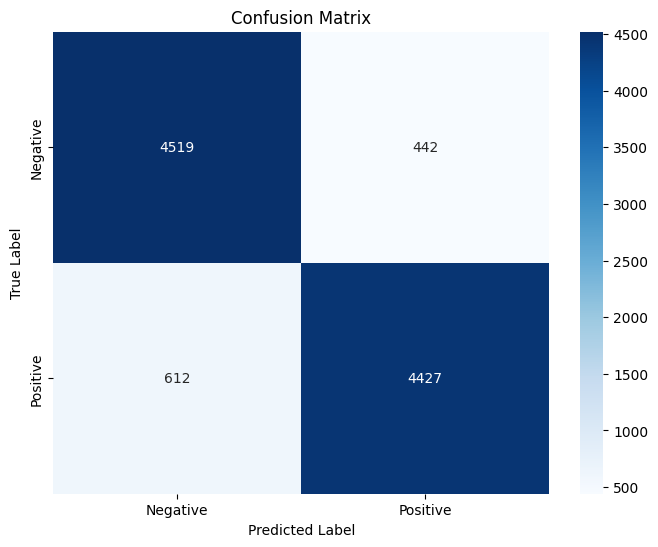

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
# Display classification report
cnn_bilstm_y_pred = (cnn_bilstm_model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, cnn_bilstm_y_pred, target_names=['Negative', 'Positive']))

# Compute confusion matrix
cnn_bilstm_cm = confusion_matrix(y_test, cnn_bilstm_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_bilstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


LSTM

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE USERNAME'] = 'nityashrees'
os.environ['KAGGLE KEY'] = '7023687b07168a9ba0d6a3fa364819a6'
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
100% 25.7M/25.7M [00:00<00:00, 68.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 63.1MB/s]


In [ ]:
!unzip /content/imdb-dataset-of-50k-movie-reviews.zip

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# For evaluation
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


In [ ]:
# Load the dataset
df = pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews.zip')
df.head()

# Check for any missing values
df.isnull().sum()


,0
review,0
sentiment,0


In [ ]:
# Converting sentiment to binary (positive=1, negative=0)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Text tokenization and padding
X = df['review'].values
y = df['sentiment'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Padding sequences to ensure uniform input length
X = pad_sequences(X, maxlen=200)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the initial LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))

# LSTM layer with Dropout
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Dense layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 344s 542ms/step - accuracy: 0.7442 - loss: 0.5061 - val_accuracy: 0.8570 - val_loss: 0.3433
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 301s 481ms/step - accuracy: 0.8355 - loss: 0.3924 - val_accuracy: 0.5301 - val_loss: 1.0886
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 478ms/step - accuracy: 0.7731 - loss: 0.4669 - val_accuracy: 0.8755 - val_loss: 0.3015
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 300s 480ms/step - accuracy: 0.8986 - loss: 0.2512 - val_accuracy: 0.8979 - val_loss: 0.2548
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 321s 479ms/step - accuracy: 0.9186 - loss: 0.2080 - val_accuracy: 0.8906 - val_loss: 0.2671


In [ ]:
# Rebuilding the LSTM model with more complexity

model_improved = Sequential()

# Embedding layer (remains same)
model_improved.add(Embedding(input_dim=5000, output_dim=128, input_length=200))

# First LSTM layer (increase units and dropout)
model_improved.add(LSTM(units=256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))

# Adding a second LSTM layer (stacked LSTM)
model_improved.add(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3))

# Final Dense layer with sigmoid activation (same as before)
model_improved.add(Dense(1, activation='sigmoid'))

# Compile the improved model
model_improved.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_improved.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the improved model for more epochs
history_improved = model_improved.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1048s 2s/step - accuracy: 0.7315 - loss: 0.5257 - val_accuracy: 0.8037 - val_loss: 0.4389
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1101s 2s/step - accuracy: 0.8211 - loss: 0.4095 - val_accuracy: 0.8572 - val_loss: 0.3441
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1039s 2s/step - accuracy: 0.8486 - loss: 0.3594 - val_accuracy: 0.8790 - val_loss: 0.3045
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1041s 2s/step - accuracy: 0.8867 - loss: 0.2768 - val_accuracy: 0.8896 - val_loss: 0.2710
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1043s 2s/step - accuracy: 0.9020 - loss: 0.2462 - val_accuracy: 0.8920 - val_loss: 0.2638
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1038s 2s/step - accuracy: 0.9134 - loss: 0.2234 - val_accuracy: 0.8948 - val_loss: 0.2630
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1040s 2s/step - accuracy: 0.9239 - loss: 0.1974 - val_accuracy: 0.8962 - val_loss: 0.2572
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1039s 2s/step - accuracy: 0.9304 - loss: 0.1856 - 

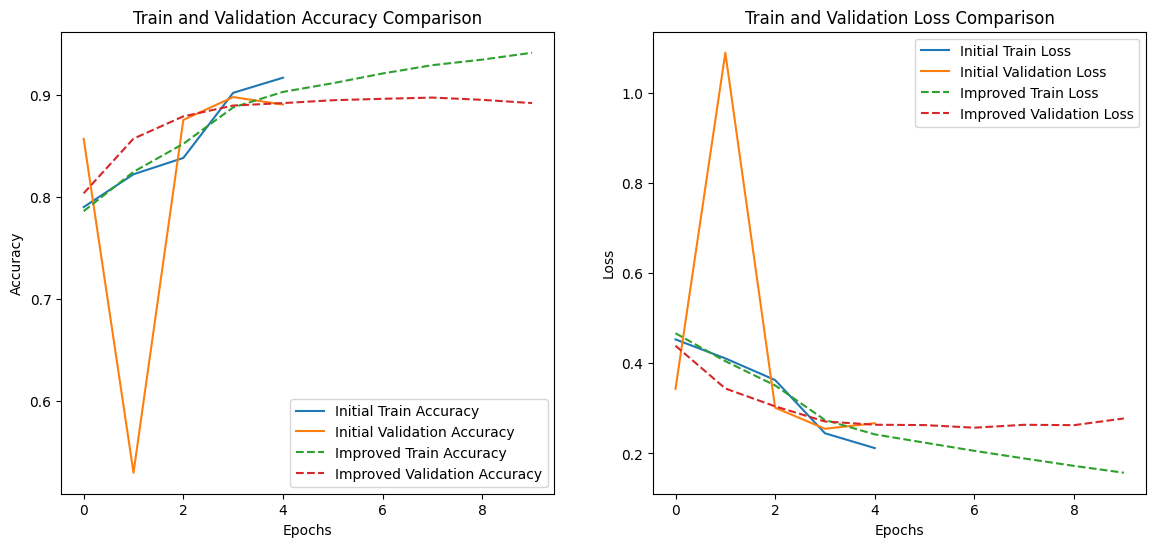

In [ ]:
# Plotting accuracy and loss comparison
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Initial Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Validation Accuracy')
plt.plot(history_improved.history['accuracy'], label='Improved Train Accuracy', linestyle='--')
plt.plot(history_improved.history['val_accuracy'], label='Improved Validation Accuracy', linestyle='--')
plt.title('Train and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Initial Train Loss')
plt.plot(history.history['val_loss'], label='Initial Validation Loss')
plt.plot(history_improved.history['loss'], label='Improved Train Loss', linestyle='--')
plt.plot(history_improved.history['val_loss'], label='Improved Validation Loss', linestyle='--')
plt.title('Train and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step
Initial Model - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.88      4961
           1       0.86      0.94      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



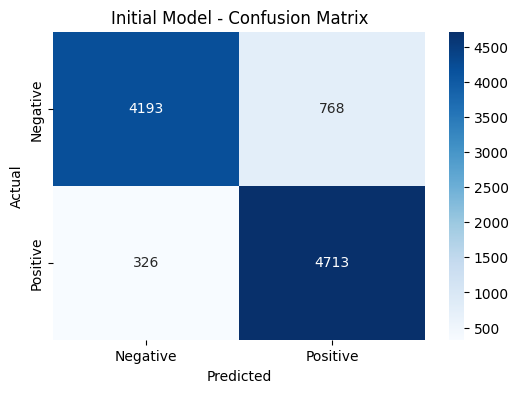

In [ ]:
# Predictions for initial model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report for initial model
print("Initial Model - Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix for initial model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Initial Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 311ms/step
Improved Model - Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      4961
           1       0.87      0.92      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



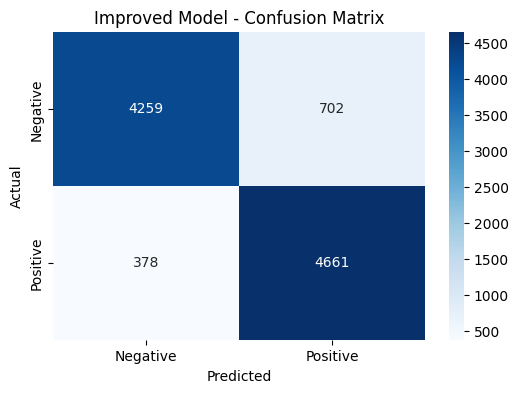

In [ ]:
# Predictions for improved model
y_pred_improved = (model_improved.predict(X_test) > 0.5).astype("int32")

# Classification report for improved model
print("Improved Model - Classification Report:\n", classification_report(y_test, y_pred_improved))

# Confusion matrix for improved model
conf_matrix_improved = confusion_matrix(y_test, y_pred_improved)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_improved, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Improved Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
